In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Greenland = pd.read_excel(filepath, sheet_name='Greenland-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Greenland)
fp.date_time(Greenland)

,Extent,Date
0,1076123.146,1979-01-01
1,1099248.063,1979-02-01
2,1036964.901,1979-03-01
3,958927.937,1979-04-01
4,823812.694,1979-05-01
...,...,...
533,721350.515,2023-06-01
534,459033.164,2023-07-01
535,282045.909,2023-08-01
536,270397.608,2023-09-01


In [5]:
scaler = MinMaxScaler()
Greenland['Extent'] = scaler.fit_transform(Greenland['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Greenland['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Greenland_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
51/53 [===========================>..] - ETA: 0s - loss: 0.3025 - root_mean_squared_error: 0.5500

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 7s 80ms/step - loss: 0.3013 - root_mean_squared_error: 0.5489 - val_loss: 0.1642 - val_root_mean_squared_error: 0.4052
Epoch 2/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2531 - root_mean_squared_error: 0.5031

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.2516 - root_mean_squared_error: 0.5016 - val_loss: 0.1332 - val_root_mean_squared_error: 0.3649
Epoch 3/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2158 - root_mean_squared_error: 0.4645

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 6s 115ms/step - loss: 0.2137 - root_mean_squared_error: 0.4623 - val_loss: 0.1070 - val_root_mean_squared_error: 0.3271
Epoch 4/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1753 - root_mean_squared_error: 0.4187

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 7s 134ms/step - loss: 0.1772 - root_mean_squared_error: 0.4209 - val_loss: 0.0835 - val_root_mean_squared_error: 0.2890
Epoch 5/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1463 - root_mean_squared_error: 0.3825

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.1457 - root_mean_squared_error: 0.3817 - val_loss: 0.0624 - val_root_mean_squared_error: 0.2498
Epoch 6/50
44/53 [=======================>......] - ETA: 0s - loss: 0.1235 - root_mean_squared_error: 0.3514

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.1176 - root_mean_squared_error: 0.3429 - val_loss: 0.0506 - val_root_mean_squared_error: 0.2248
Epoch 7/50
53/53 [==============================] - ETA: 0s - loss: 0.0927 - root_mean_squared_error: 0.3044

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 8s 157ms/step - loss: 0.0927 - root_mean_squared_error: 0.3044 - val_loss: 0.0403 - val_root_mean_squared_error: 0.2007
Epoch 8/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0740 - root_mean_squared_error: 0.2721

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0721 - root_mean_squared_error: 0.2685 - val_loss: 0.0314 - val_root_mean_squared_error: 0.1772
Epoch 9/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0574 - root_mean_squared_error: 0.2395

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 67ms/step - loss: 0.0559 - root_mean_squared_error: 0.2364 - val_loss: 0.0256 - val_root_mean_squared_error: 0.1600
Epoch 10/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0454 - root_mean_squared_error: 0.2132

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0419 - root_mean_squared_error: 0.2047 - val_loss: 0.0202 - val_root_mean_squared_error: 0.1420
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0340 - root_mean_squared_error: 0.1843

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0334 - root_mean_squared_error: 0.1828 - val_loss: 0.0178 - val_root_mean_squared_error: 0.1336
Epoch 12/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0254 - root_mean_squared_error: 0.1594

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0254 - root_mean_squared_error: 0.1595 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0212 - root_mean_squared_error: 0.1457

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 60ms/step - loss: 0.0215 - root_mean_squared_error: 0.1465 - val_loss: 0.0112 - val_root_mean_squared_error: 0.1057
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0181 - root_mean_squared_error: 0.1344

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0167 - root_mean_squared_error: 0.1291 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 15/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1137

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 16/50
39/53 [=====================>........] - ETA: 0s - loss: 0.0143 - root_mean_squared_error: 0.1198

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0135 - root_mean_squared_error: 0.1163 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 17/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1093

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 53ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 18/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - val_loss: 0.0103 - val_root_mean_squared_error: 0.1014
Epoch 19/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0108 - root_mean_squared_error: 0.1040

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 58ms/step - loss: 0.0108 - root_mean_squared_error: 0.1037 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0817
Epoch 20/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0106 - root_mean_squared_error: 0.1031 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0829
Epoch 21/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0942
Epoch 22/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1034
Epoch 23/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0092 - val_root_mean_squared_error: 0.0958
Epoch 24/50
53/53 [==============================] - ETA: 0s - loss: 0.0104 - root_mean_squared_error: 0.1020

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 56ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0809
Epoch 25/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0105 - root_mean_squared_error: 0.1024 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0873
Epoch 26/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0872
Epoch 27/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1072

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 57ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776
Epoch 28/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0128 - root_mean_squared_error: 0.1129

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 59ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 29/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - val_loss: 0.0098 - val_root_mean_squared_error: 0.0990
Epoch 30/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0121 - root_mean_squared_error: 0.1100 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0844
Epoch 31/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1004
Epoch 32/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0827
Epoch 33/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0069 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0096 - root_mean_squared_error: 0.0977 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0775
Epoch 42/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0113 - root_mean_squared_error: 0.1061 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0965
Epoch 43/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0108 - root_mean_squared_error: 0.1038 - val_loss: 0.0095 - val_root_mean_squared_error: 0.0975
Epoch 44/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0172 - val_root_mean_squared_error: 0.1311
Epoch 45/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0108 - root_mean_squared_error: 0.1042 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0850
Epoch 46/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - val_loss: 0.0060 - val_root_mean_squared

INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


INFO:tensorflow:Assets written to: Greenland_model_LT2\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0125 - root_mean_squared_error: 0.1116 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0773


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6232917706171672 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

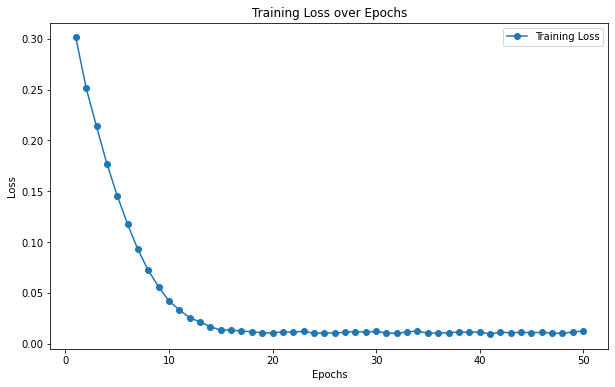

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

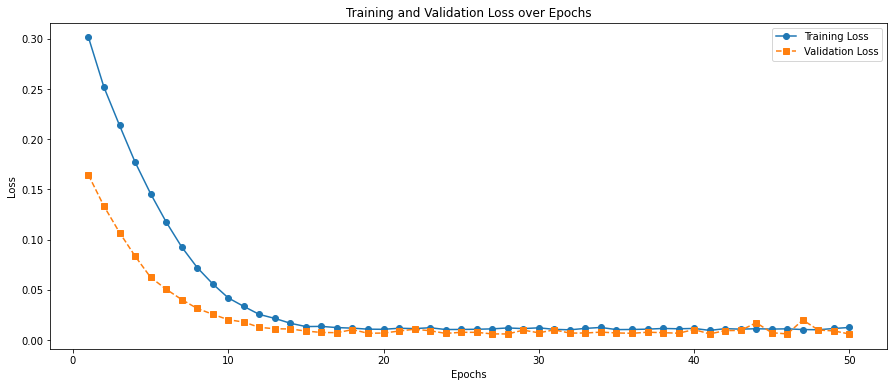

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Greenland_model_LT2/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.09384763067537806
MAE : 0.07808535077345435


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,444769.312500,604702.636
1,312451.906250,436530.907
2,210690.015625,283162.646
3,159733.000000,212475.431
4,305760.312500,386546.857
5,438249.625000,547183.986
6,538936.750000,584596.262
7,635738.375000,584830.109
8,616468.187500,641562.292
9,631098.875000,734946.437


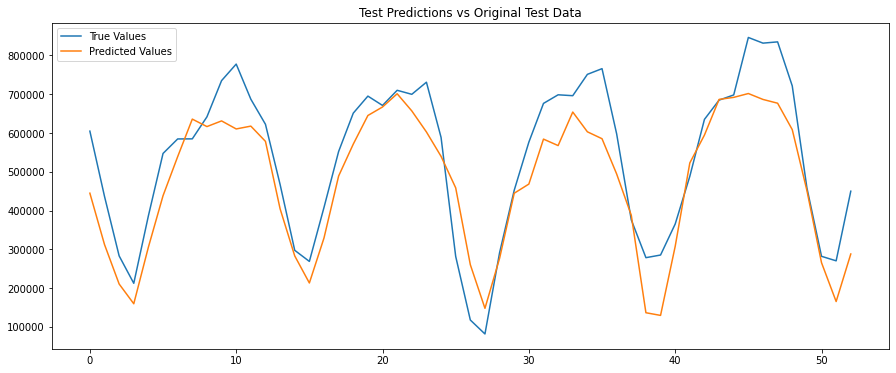

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

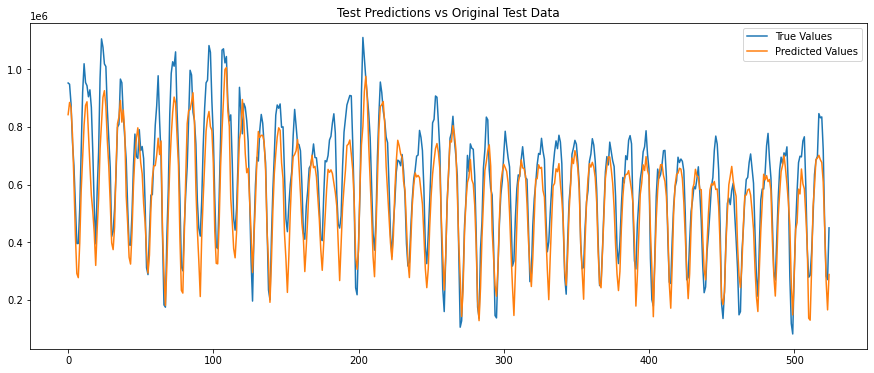

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()